# Braggs Law Analysis
This notebook contains the analysis of X-ray crystallography using Bragg's law. Noteably fitting gaussian curves to spectra peaks to find the lattice constant of crystals. This was done in my 2nd year of university.

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

## Functions

In [2]:
def bragg_d(angle, wavelength=6.7085e-11):
    """Calculates the distance between planes in a crystal when light diffracts at a given angle, 
    at a certain wavelength (default = 6.7085e-11 m).
    Angle is in degrees, and numpy is required."""
    
    d = wavelength/(2*np.sin(angle*(np.pi/180)))
    
    return d

# -------------------------------------------------------------------------------------------------------------------------

def lattice_const(angle, h=0, k=0, l=0, wavelength=6.7085e-11):
    """Calculates the lattice constant for a crystal using Bragg's law."""
    
    d = wavelength/(2*np.sin(angle*(np.pi/180)))
    a = d*(h**2 + k**2 + l**2)**0.5
    
    return a

# -------------------------------------------------------------------------------------------------------------------------

def lattice_const_err(angle, angle_err, h=0, k=0, l=0, wavelength=6.7085e-11, wave_err=2.8249e-12):
    """Calculates the error associated with the lattice constant 'a'."""
    
    radian = angle*(np.pi/180)
    radian_err = angle_err*(np.pi/180)
    
    d_err = ((1/(2*np.sin(radian)))**2 * (wave_err)**2 + (wavelength*np.cos(radian)/(2*(np.sin(radian)**2)))**2 * (radian_err)**2)**0.5
    a_err = d_err*(h**2 + k**2 + l**2)**0.5
    
    return a_err

# -------------------------------------------------------------------------------------------------------------------------

def gaussian(x, A, mu, sigma, B):
    """Returns a gaussian using the equation: Aexp(-(x-mu)^2)/2sigma^2)+B"""
    y = A*np.exp((-(x-mu)**2)/(2*sigma**2))+B
    
    return y

# -------------------------------------------------------------------------------------------------------------------------

def gaussian_values(angle, count, A_guess, mu_guess, sig_guess, B_guess):
    """Returns the values of a gaussian function fitted to the 
    data using curve fit"""
    
    bestfit, cov = curve_fit(gaussian, angle, count, p0=[A_guess, mu_guess, sig_guess, B_guess], maxfev=10000)
    
    return bestfit, cov

# -------------------------------------------------------------------------------------------------------------------------

def gauss_lattice_const(angles, counts, A_guess, mu_guess, sig_guess, B_guess, h=0, k=0, l=0, wavelength=6.7085e-11, wave_err=2.8249e-12):
    """Takes the data points around a peak and fits a gaussian to them, uses the gaussian values with h,k,l to find 
    the lattice constant and also finds the associated error."""
    
    lat_const = []
    
    gauss_vals, cov = gaussian_values(angles, counts, A_guess, mu_guess, sig_guess, B_guess)
    peak_angle = gauss_vals[1]
    half_width = gauss_vals[2]
    
    a = lattice_const(peak_angle, h, k, l, wavelength)
    a_err = lattice_const_err(peak_angle, half_width, h, k, l, wavelength, wave_err)
    
    lat_const.append(a)
    lat_const.append(a_err)
    
    return lat_const

## Importing and Sorting Data

In [3]:
test = np.genfromtxt('NaCl (100) Data 1.csv', skip_header=3, delimiter=',', unpack=True, encoding='ANSI')
test

array([[  0. ,   2. ,   4. , ..., 536. , 538. , 540. ],
       [377. , 371. , 338. , ...,  21. ,  23. ,  32. ],
       [ 35. ,  35. ,  35. , ...,  35. ,  35. ,  35. ],
       [  1. ,   1. ,   1. , ...,   1. ,   1. ,   1. ],
       [  6. ,   6.2,   6.4, ...,  59.6,  59.8,  60. ],
       [  3. ,   3.1,   3.2, ...,  29.8,  29.9,  30. ]])

In [4]:
data = []

for i in range(0,3,1):
    if i == 0:
        for i in range(1,4,1):
            file = 'NaCl (100) Data ' + str(i) + '.csv'
            tp = np.genfromtxt(file, skip_header=3, delimiter=',', unpack=True, encoding='ANSI')
            data.append(tp)
    elif i == 1:
        for i in range(1,4,1):
            file = 'NaCl (110) Data ' + str(i) + '.csv'
            tp = np.genfromtxt(file, skip_header=3, delimiter=',', unpack=True, encoding='ANSI')
            data.append(tp)
    elif i == 2:
        for i in range(1,4,1):
            file = 'NaCl (111) Data ' + str(i) + '.csv'
            tp = np.genfromtxt(file, skip_header=3, delimiter=',', unpack=True, encoding='ANSI')
            data.append(tp)
            
# Data is all in one list
#data

In [5]:
# Pick out the impulses and crystal angles from each element of the data list
impulse_1001 = data[0][1]
c_angle_1001 = data[0][5]
impulse_1002 = data[1][1]
c_angle_1002 = data[1][5]
impulse_1003 = data[2][1]
c_angle_1003 = data[2][5]

impulse_1101 = data[3][1]
c_angle_1101 = data[3][5]
impulse_1102 = data[4][1]
c_angle_1102 = data[4][5]
impulse_1103 = data[5][1]
c_angle_1103 = data[5][5]

impulse_1111 = data[6][1]
c_angle_1111 = data[6][5]
impulse_1112 = data[7][1]
c_angle_1112 = data[7][5]
impulse_1113 = data[8][1]
c_angle_1113 = data[8][5]

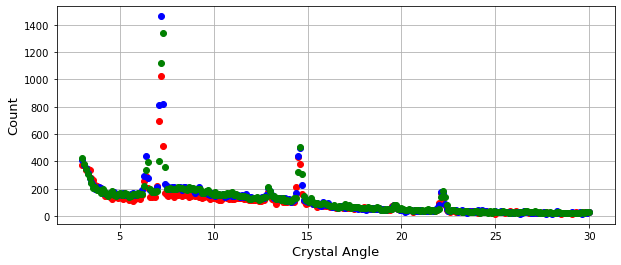

In [6]:
# Plotting the data to check it is correctly imported
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot()
ax.grid(visible=True)

ax.set_xlabel('Crystal Angle', fontsize=13)
ax.set_ylabel('Count', fontsize=13)

ax.scatter(x=c_angle_1001, y=impulse_1001, color='r', label='Data', zorder=5)
ax.scatter(x=c_angle_1002, y=impulse_1002, color='b', label='Data', zorder=5)
ax.scatter(x=c_angle_1003, y=impulse_1003, color='g', label='Data', zorder=5)

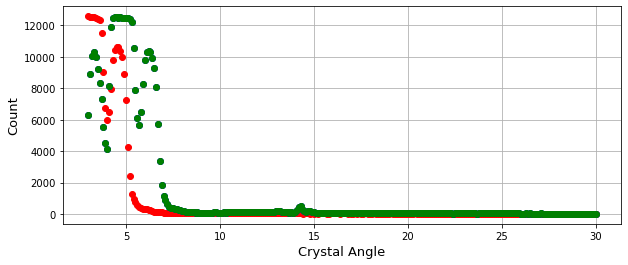

In [7]:
# Plotting the data to check it is correctly imported
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot()
ax.grid(visible=True)

ax.set_xlabel('Crystal Angle', fontsize=13)
ax.set_ylabel('Count', fontsize=13)

ax.scatter(x=c_angle_1101, y=impulse_1101, color='r', label='Data', zorder=5)
ax.scatter(x=c_angle_1102, y=impulse_1102, color='b', label='Data', zorder=5)
ax.scatter(x=c_angle_1103, y=impulse_1103, color='g', label='Data', zorder=5)

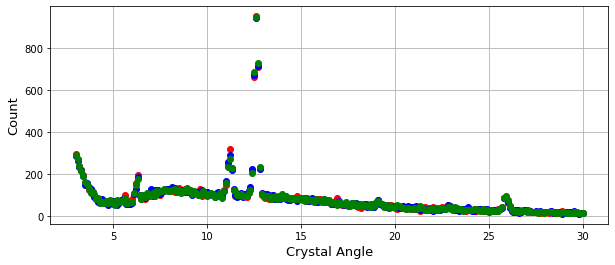

In [8]:
# Plotting the data to check it is correctly imported
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot()
ax.grid(visible=True)

ax.set_xlabel('Crystal Angle', fontsize=13)
ax.set_ylabel('Count', fontsize=13)

ax.scatter(x=c_angle_1111, y=impulse_1111, color='r', label='Data', zorder=5)
ax.scatter(x=c_angle_1112, y=impulse_1112, color='b', label='Data', zorder=5)
ax.scatter(x=c_angle_1113, y=impulse_1113, color='g', label='Data', zorder=5)

Data has been imported correctly! :D

## Calculating the lattice constant for NaCl (100)
NaCl (200) should have a lattice constant of 0.564 nm. Source:
https://physicsopenlab.org/2018/01/22/sodium-chloride-nacl-crystal/

Start by combining the NaCl (100) data files together

In [9]:
NaCl_100_imp = []
NaCl_100_angle = []

for i in range(0, len(impulse_1001), 1):
    # Append the data points to each list
    NaCl_100_imp.append(impulse_1001[i])
    NaCl_100_imp.append(impulse_1002[i])
    NaCl_100_imp.append(impulse_1003[i])

    NaCl_100_angle.append(c_angle_1001[i])
    NaCl_100_angle.append(c_angle_1002[i])
    NaCl_100_angle.append(c_angle_1003[i])

#NaCl_100_angle
#NaCl_100_imp

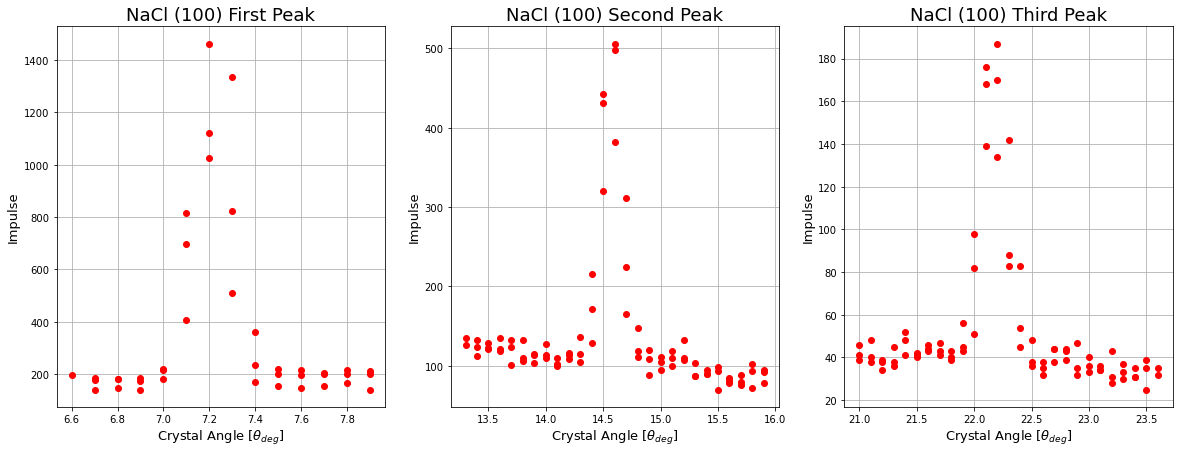

In [10]:
fig, axs = plt.subplots(1,3, figsize=(20,7))
axs[0].grid(visible=True), axs[1].grid(visible=True), axs[2].grid(visible=True)

axs[0].set_xlabel('Crystal Angle $[θ_{deg}]$', fontsize=13), axs[0].set_ylabel('Impulse', fontsize=13)
axs[1].set_xlabel('Crystal Angle $[θ_{deg}]$', fontsize=13), axs[1].set_ylabel('Impulse', fontsize=13)
axs[2].set_xlabel('Crystal Angle $[θ_{deg}]$', fontsize=13), axs[2].set_ylabel('Impulse', fontsize=13)

axs[0].set_title('NaCl (100) First Peak', fontsize = 18)
axs[1].set_title('NaCl (100) Second Peak', fontsize = 18)
axs[2].set_title('NaCl (100) Third Peak', fontsize = 18)

a1 = 110
b1 = 150

a2 = 310
b2 = 390

a3 = 540
b3 = 620

axs[0].scatter(x= NaCl_100_angle[a1:b1], y= NaCl_100_imp[a1:b1], color='r', label='Data', zorder=5)
axs[1].scatter(x= NaCl_100_angle[a2:b2], y= NaCl_100_imp[a2:b2], color='r', label='Data', zorder=5)
axs[2].scatter(x= NaCl_100_angle[a3:b3], y= NaCl_100_imp[a3:b3], color='r', label='Data', zorder=5)

In [11]:
bestfit1, cov1 = curve_fit(gaussian, NaCl_100_angle[a1:b1], NaCl_100_imp[a1:b1], p0=[1400,7.2,0.25, 0], maxfev=10000)
bestfit2, cov2 = curve_fit(gaussian, NaCl_100_angle[a2:b2], NaCl_100_imp[a2:b2], p0=[500,14.5,0.25, 0], maxfev=10000)
bestfit3, cov3 = curve_fit(gaussian, NaCl_100_angle[a3:b3], NaCl_100_imp[a3:b3], p0=[180,22.25,0.25, 0], maxfev=10000)

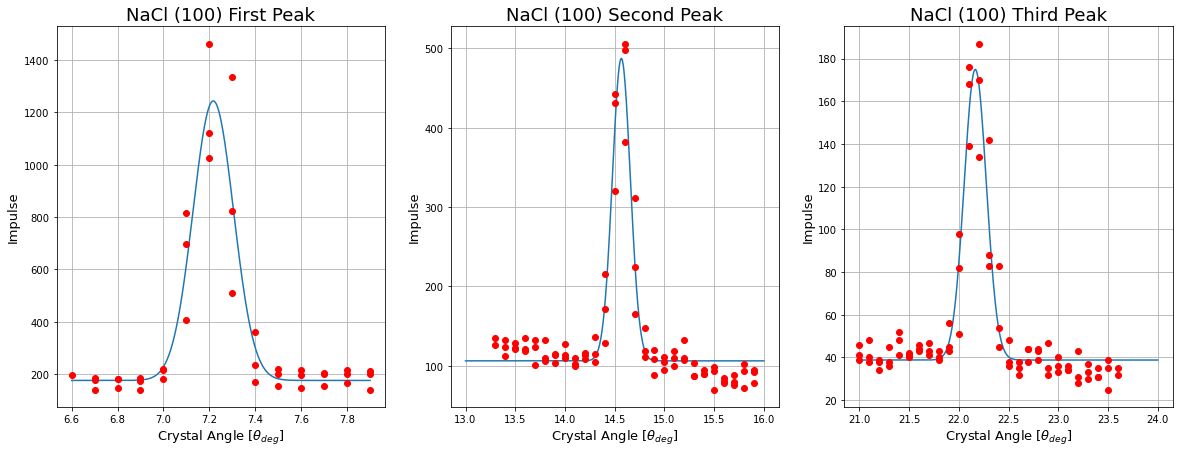

In [12]:
fig, axs = plt.subplots(1,3, figsize=(20,7))
axs[0].grid(visible=True), axs[1].grid(visible=True), axs[2].grid(visible=True)

axs[0].set_xlabel('Crystal Angle $[θ_{deg}]$', fontsize=13), axs[0].set_ylabel('Impulse', fontsize=13)
axs[1].set_xlabel('Crystal Angle $[θ_{deg}]$', fontsize=13), axs[1].set_ylabel('Impulse', fontsize=13)
axs[2].set_xlabel('Crystal Angle $[θ_{deg}]$', fontsize=13), axs[2].set_ylabel('Impulse', fontsize=13)

axs[0].set_title('NaCl (100) First Peak', fontsize = 18)
axs[1].set_title('NaCl (100) Second Peak', fontsize = 18)
axs[2].set_title('NaCl (100) Third Peak', fontsize = 18)

axs[0].scatter(x= NaCl_100_angle[a1:b1], y= NaCl_100_imp[a1:b1], color='r', label='Data', zorder=5)
axs[1].scatter(x= NaCl_100_angle[a2:b2], y= NaCl_100_imp[a2:b2], color='r', label='Data', zorder=5)
axs[2].scatter(x= NaCl_100_angle[a3:b3], y= NaCl_100_imp[a3:b3], color='r', label='Data', zorder=5)

xvals1 = np.linspace(6.6,7.9,500)
xvals2 = np.linspace(13,16,500)
xvals3 = np.linspace(21,24,500)

yvals1 = gaussian(xvals1, bestfit1[0], bestfit1[1], bestfit1[2], bestfit1[3])
yvals2 = gaussian(xvals2, bestfit2[0], bestfit2[1], bestfit2[2], bestfit2[3])
yvals3 = gaussian(xvals3, bestfit3[0], bestfit3[1], bestfit3[2], bestfit3[3])

axs[0].plot(xvals1, yvals1)
axs[1].plot(xvals2, yvals2)
axs[2].plot(xvals3, yvals3)

In [13]:
fig.savefig('NaCl(100) Indiv_peaks.png', bbox_inches = 'tight', dpi=300)

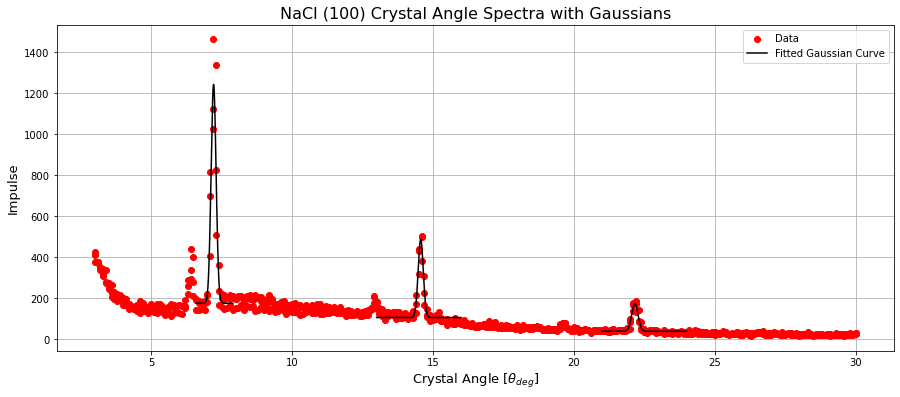

In [14]:
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot()
ax.grid(visible=True)

ax.set_title('NaCl (100) Crystal Angle Spectra with Gaussians', fontsize=16)
ax.set_xlabel('Crystal Angle $[θ_{deg}]$', fontsize=13)
ax.set_ylabel('Impulse', fontsize=13)

ax.scatter(x=NaCl_100_angle, y=NaCl_100_imp, color='r', label='Data', zorder=5)

xvals = np.linspace(2,30,10000)

ax.plot(xvals1, yvals1, color='black', zorder=6, label='Fitted Gaussian Curve')
ax.plot(xvals2, yvals2, color='black', zorder=6)
ax.plot(xvals3, yvals3, color='black', zorder=6)

ax.legend()

In [15]:
fig.savefig('NaCl(100) Fitted_Plot.png', bbox_inches = 'tight', dpi=300)
#fig.savefig('NaCl(100) Indiv_peaks.png', bbox_inches = 'tight', dpi=300)

In [16]:
peak1_a100 = gauss_lattice_const(NaCl_100_angle[a1:b1], NaCl_100_imp[a1:b1], 1400, 7.25, 0.25, 0, h=2)
peak2_a100 = gauss_lattice_const(NaCl_100_angle[a2:b2], NaCl_100_imp[a2:b2], 500,14.5,0.25, 0, h=4)
peak3_a100 =gauss_lattice_const(NaCl_100_angle[a3:b3], NaCl_100_imp[a3:b3], 180,22.25,0.25, 0, h=6)

Error on the mean is given by:

$$\sigma_{\bar{x}} = {\sigma_{x}\over \sqrt{N}}$$

* $\sigma_{x}$ = Standard error
* $N$ = Number of data points

In [17]:
# Separate the values into two lists containing the values and errors respectively
a100_list = np.array([peak1_a100[0], peak2_a100[0], peak3_a100[0]])
a100_err_list = [peak1_a100[1], peak2_a100[1], peak3_a100[1]]

# Average the lattice constants (as they should be equivalent) and their errors
a100 = (peak1_a100[0] + peak2_a100[0] + peak3_a100[0]) / 3

# Error from previous errors added in quadrature, then divided by 3 for the average
a100_err = (((peak1_a100[1])**2 + (peak2_a100[1])**2 + (peak3_a100[1])**2)**0.5) / 3

# Convert units to nm (from m)
a100_nm = a100*(1e9)
a100_nm_err = a100_err*(1e9)

print(f'NaCl (100) has a lattice constant of {a100_nm} ± {a100_nm_err} nm')

NaCl (100) has a lattice constant of 0.5336293106450268 ± 0.01322475702092103 nm


## Calculating the lattice constant for NaCl (110)

In [18]:
NaCl_110_imp = impulse_1102
NaCl_110_angle = c_angle_1102

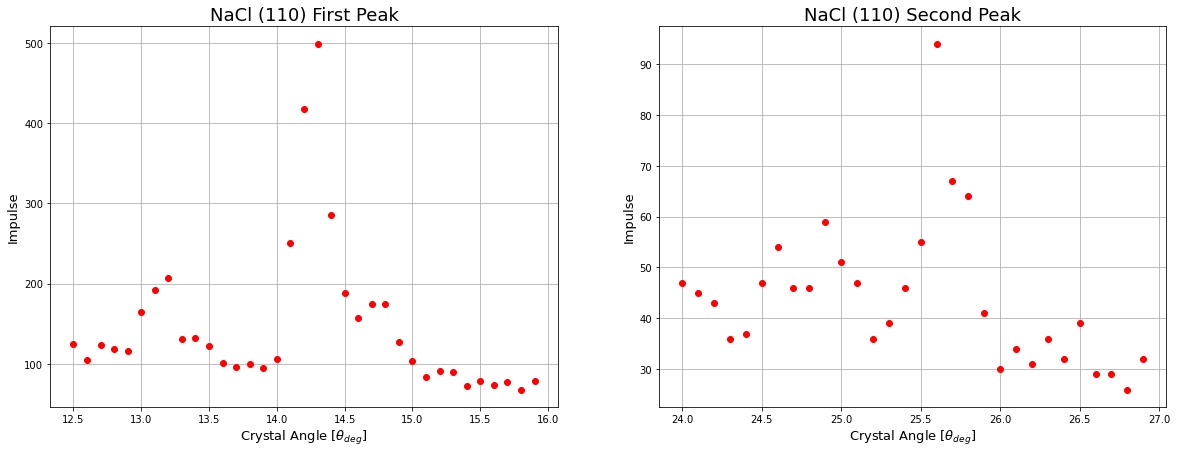

In [19]:
fig, axs = plt.subplots(1,2, figsize=(20,7))
axs[0].grid(visible=True), axs[1].grid(visible=True)

axs[0].set_xlabel('Crystal Angle $[θ_{deg}]$', fontsize=13), axs[0].set_ylabel('Impulse', fontsize=13)
axs[1].set_xlabel('Crystal Angle $[θ_{deg}]$', fontsize=13), axs[1].set_ylabel('Impulse', fontsize=13)

axs[0].set_title('NaCl (110) First Peak', fontsize = 18)
axs[1].set_title('NaCl (110) Second Peak', fontsize = 18)

a1 = 95
b1 = 130

a2 = 210
b2 = 240

axs[0].scatter(x= NaCl_110_angle[a1:b1], y= NaCl_110_imp[a1:b1], color='r', label='Data', zorder=5)
axs[1].scatter(x= NaCl_110_angle[a2:b2], y= NaCl_110_imp[a2:b2], color='r', label='Data', zorder=5)

In [20]:
bestfit1_110, cov1_110 = curve_fit(gaussian, NaCl_110_angle[a1:b1], NaCl_110_imp[a1:b1], p0=[500,14.25,0.25, 0], maxfev=10000)
bestfit2_110, cov2_110 = curve_fit(gaussian, NaCl_110_angle[a2:b2], NaCl_110_imp[a2:b2], p0=[100,25.5,0.25, 0], maxfev=10000)

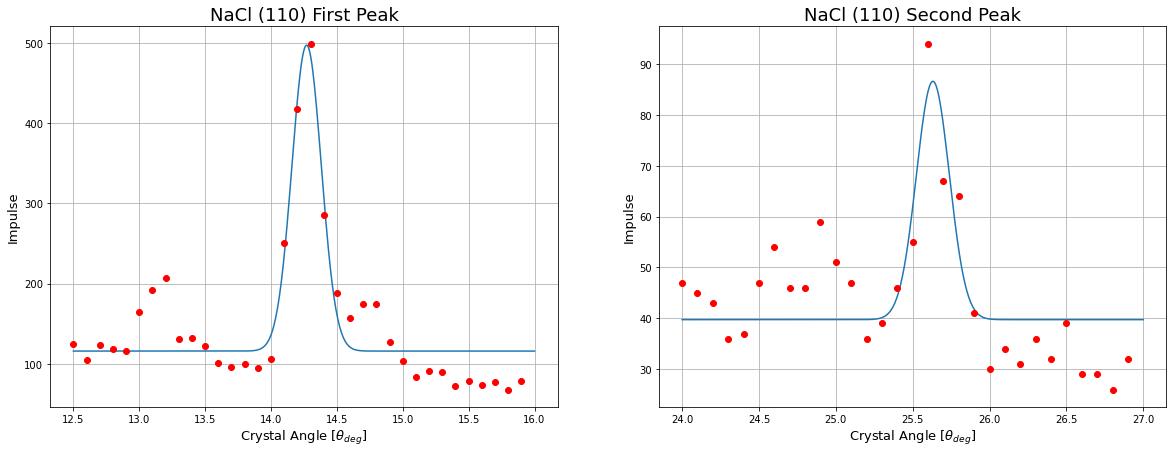

In [21]:
fig, axs = plt.subplots(1,2, figsize=(20,7))
axs[0].grid(visible=True), axs[1].grid(visible=True)

axs[0].set_xlabel('Crystal Angle $[θ_{deg}]$', fontsize=13), axs[0].set_ylabel('Impulse', fontsize=13)
axs[1].set_xlabel('Crystal Angle $[θ_{deg}]$', fontsize=13), axs[1].set_ylabel('Impulse', fontsize=13)

axs[0].set_title('NaCl (110) First Peak', fontsize = 18)
axs[1].set_title('NaCl (110) Second Peak', fontsize = 18)

axs[0].scatter(x= NaCl_110_angle[a1:b1], y= NaCl_110_imp[a1:b1], color='r', label='Data', zorder=5)
axs[1].scatter(x= NaCl_110_angle[a2:b2], y= NaCl_110_imp[a2:b2], color='r', label='Data', zorder=5)

xvals1 = np.linspace(12.5,16,500)
xvals2 = np.linspace(24,27,500)

yvals1 = gaussian(xvals1, bestfit1_110[0], bestfit1_110[1], bestfit1_110[2], bestfit1_110[3])
yvals2 = gaussian(xvals2, bestfit2_110[0], bestfit2_110[1], bestfit2_110[2], bestfit2_110[3])

axs[0].plot(xvals1, yvals1)
axs[1].plot(xvals2, yvals2)

In [22]:
fig.savefig('NaCl(110) Indiv_peaks.png', bbox_inches = 'tight', dpi=300)

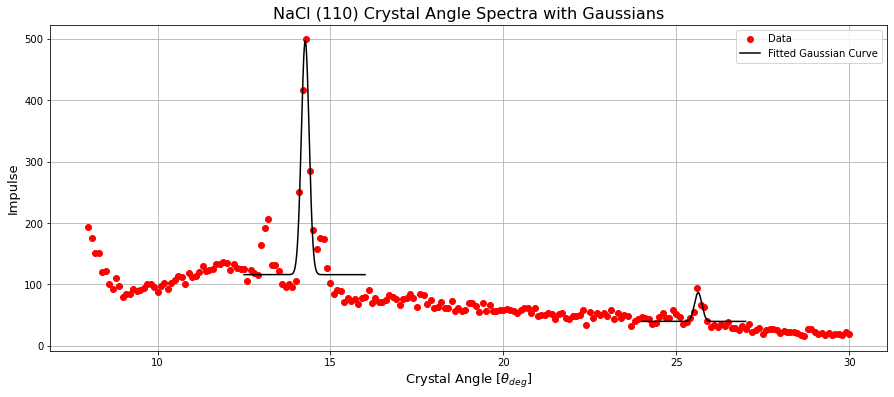

In [23]:
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot()
ax.grid(visible=True)

ax.set_title('NaCl (110) Crystal Angle Spectra with Gaussians', fontsize=16)
ax.set_xlabel('Crystal Angle $[θ_{deg}]$', fontsize=13)
ax.set_ylabel('Impulse', fontsize=13)

#ax.scatter(x=NaCl_110_angle, y=NaCl_110_imp, color='r', label='Data', zorder=5)
ax.scatter(x=NaCl_110_angle[50:], y=NaCl_110_imp[50:], color='r', label='Data', zorder=5)

ax.plot(xvals1, yvals1, color='black', zorder=6, label='Fitted Gaussian Curve')
ax.plot(xvals2, yvals2, color='black', zorder=6)

ax.legend()

In [24]:
fig.savefig('NaCl(110) Fitted_Plot.png', bbox_inches = 'tight', dpi=300)

In [25]:
peak1_a110 = gauss_lattice_const(NaCl_110_angle[a1:b1], NaCl_110_imp[a1:b1], 500, 14.25, 0.25, 0, h=2, k=2, l=0)
peak2_a110 = gauss_lattice_const(NaCl_110_angle[a2:b2], NaCl_110_imp[a2:b2], 100,25.5,0.25, 0, h=4, k=4, l=0)

In [26]:
# Separate the values into two lists containing the values and errors respectively
a110_list = np.array([peak1_a110[0], peak2_a110[0]])
a110_err_list = [peak1_a110[1], peak2_a110[1]]

# Average the lattice constants (as they should be equivalent) and their errors
a110 = (peak1_a110[0] + peak2_a110[0]) / 2

# Error from previous errors added in quadrature, then divided by 2 for the average
a110_err = (((peak1_a110[1])**2 + (peak2_a110[1])**2)**0.5) / 2

# Convert units to nm (from m)
a110_nm = a110*(1e9)
a110_nm_err = a110_err*(1e9)

print(f'NaCl (110) has a lattice constant of {a110_nm} ± {a110_nm_err} nm')

NaCl (110) has a lattice constant of 0.4117609680776728 ± 0.012404035120091113 nm


## Calculating the lattice constant for NaCl (110)

In [27]:
NaCl_111_imp = []
NaCl_111_angle = []

for i in range(0, len(impulse_1111), 1):
    # Append the data points to each list
    NaCl_111_imp.append(impulse_1111[i])
    NaCl_111_imp.append(impulse_1112[i])
    NaCl_111_imp.append(impulse_1113[i])

    NaCl_111_angle.append(c_angle_1111[i])
    NaCl_111_angle.append(c_angle_1112[i])
    NaCl_111_angle.append(c_angle_1113[i])

#NaCl_111_angle
#NaCl_111_imp

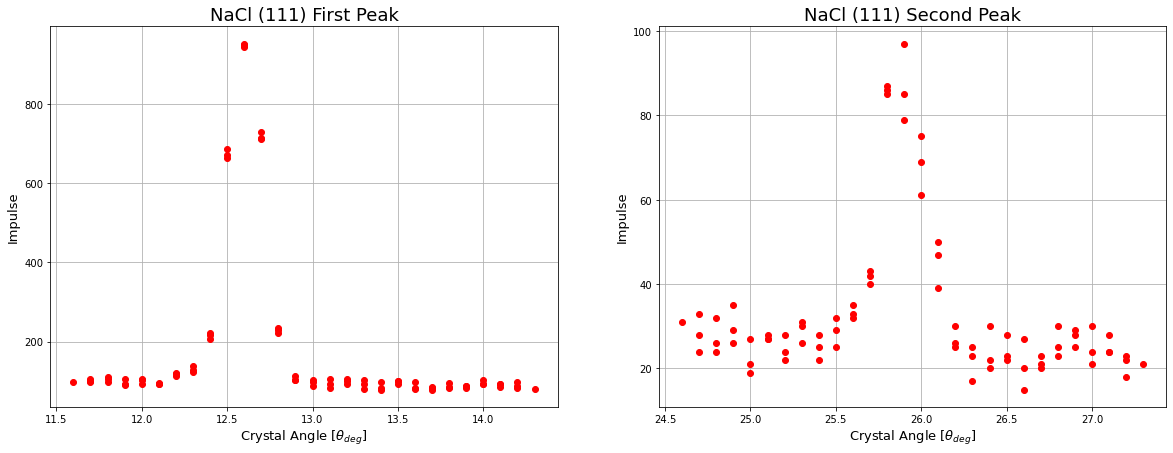

In [28]:
fig, axs = plt.subplots(1,2, figsize=(20,7))
axs[0].grid(visible=True), axs[1].grid(visible=True)

axs[0].set_xlabel('Crystal Angle $[θ_{deg}]$', fontsize=13), axs[0].set_ylabel('Impulse', fontsize=13)
axs[1].set_xlabel('Crystal Angle $[θ_{deg}]$', fontsize=13), axs[1].set_ylabel('Impulse', fontsize=13)

axs[0].set_title('NaCl (111) First Peak', fontsize = 18)
axs[1].set_title('NaCl (111) Second Peak', fontsize = 18)

a1 = 260
b1 = 340

a2 = 650
b2 = 730

axs[0].scatter(x= NaCl_111_angle[a1:b1], y= NaCl_111_imp[a1:b1], color='r', label='Data', zorder=5)
axs[1].scatter(x= NaCl_111_angle[a2:b2], y= NaCl_111_imp[a2:b2], color='r', label='Data', zorder=5)

In [29]:
bestfit1_111, cov1_111 = curve_fit(gaussian, NaCl_111_angle[a1:b1], NaCl_111_imp[a1:b1], p0=[900,12.5,0.25, 0], maxfev=10000)
bestfit2_111, cov2_111 = curve_fit(gaussian, NaCl_111_angle[a2:b2], NaCl_111_imp[a2:b2], p0=[100,26,0.25, 0], maxfev=10000)

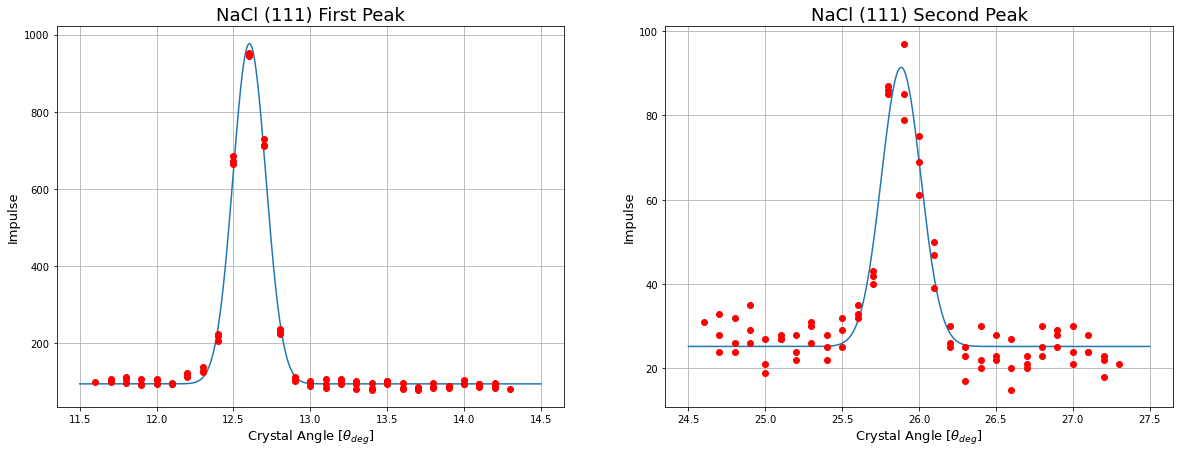

In [30]:
fig, axs = plt.subplots(1,2, figsize=(20,7))
axs[0].grid(visible=True), axs[1].grid(visible=True)

axs[0].set_xlabel('Crystal Angle $[θ_{deg}]$', fontsize=13), axs[0].set_ylabel('Impulse', fontsize=13)
axs[1].set_xlabel('Crystal Angle $[θ_{deg}]$', fontsize=13), axs[1].set_ylabel('Impulse', fontsize=13)

axs[0].set_title('NaCl (111) First Peak', fontsize = 18)
axs[1].set_title('NaCl (111) Second Peak', fontsize = 18)

axs[0].scatter(x= NaCl_111_angle[a1:b1], y= NaCl_111_imp[a1:b1], color='r', label='Data', zorder=5)
axs[1].scatter(x= NaCl_111_angle[a2:b2], y= NaCl_111_imp[a2:b2], color='r', label='Data', zorder=5)

xvals1 = np.linspace(11.5,14.5,500)
xvals2 = np.linspace(24.5,27.5,500)

yvals1 = gaussian(xvals1, bestfit1_111[0], bestfit1_111[1], bestfit1_111[2], bestfit1_111[3])
yvals2 = gaussian(xvals2, bestfit2_111[0], bestfit2_111[1], bestfit2_111[2], bestfit2_111[3])

axs[0].plot(xvals1, yvals1)
axs[1].plot(xvals2, yvals2)

In [31]:
fig.savefig('NaCl(111) Indiv_peaks.png', bbox_inches = 'tight', dpi=300)

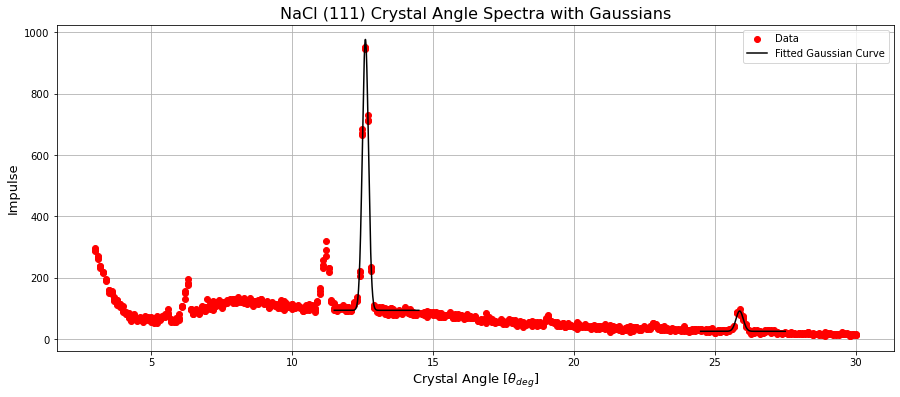

In [32]:
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot()
ax.grid(visible=True)

ax.set_title('NaCl (111) Crystal Angle Spectra with Gaussians', fontsize=16)
ax.set_xlabel('Crystal Angle $[θ_{deg}]$', fontsize=13)
ax.set_ylabel('Impulse', fontsize=13)

ax.scatter(x=NaCl_111_angle, y=NaCl_111_imp, color='r', label='Data', zorder=5)

ax.plot(xvals1, yvals1, color='black', zorder=6, label='Fitted Gaussian Curve')
ax.plot(xvals2, yvals2, color='black', zorder=6)

ax.legend()

In [33]:
fig.savefig('NaCl(111) Fitted_Plot.png', bbox_inches = 'tight', dpi=300)

In [34]:
peak1_a111 = gauss_lattice_const(NaCl_111_angle[a1:b1], NaCl_111_imp[a1:b1], 900, 12.5, 0.25, 0, h=2, k=2, l=2)
peak2_a111 = gauss_lattice_const(NaCl_111_angle[a2:b2], NaCl_111_imp[a2:b2], 100,26,0.25, 0, h=4, k=4, l=4)

In [35]:
# Separate the values into two lists containing the values and errors respectively
a111_list = np.array([peak1_a111[0], peak2_a111[0]])
a111_err_list = [peak1_a111[1], peak2_a111[1]]

# Average the lattice constants (as they should be equivalent) and their errors
a111 = (peak1_a111[0] + peak2_a111[0]) / 2

# Error from previous errors added in quadrature, then divided by 3 for the average
a111_err = (((peak1_a111[1])**2 + (peak2_a111[1])**2)**0.5) / 2

# Convert units to nm (from m)
a111_nm = a111*(1e9)
a111_nm_err = a111_err*(1e9)

print(f'NaCl (111) has a lattice constant of {a111_nm} ± {a111_nm_err} nm')

NaCl (111) has a lattice constant of 0.5324182156751849 ± 0.01605686364886045 nm


### Summarising the main experiment
The lattice constants were found to be:
* $a_{100}$ = 0.534 ± 0.013 nm
* $a_{110}$ = 0.412 ± 0.012 nm $^*$
* $a_{111}$ = 0.532 ± 0.016 nm

$^* a_{110}$ was impacted by possible direct exposure to the X-rays (not measuring the reflection) in the first few degrees of measurement, this part of the data was ignored but could potentially hold the first hkl value, changing the calculated result.

The expected value of the lattice constant should be consistent across all the planes tested and should be: **0.564 nm**. 
Source: https://physicsopenlab.org/2018/01/22/sodium-chloride-nacl-crystal/
